# ANALYSING FIFA PLAYERS DATA

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
df.isna().sum().head(50)

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [3]:
df.isna().sum().tail(40)

LB                 2085
LCB                2085
CB                 2085
RCB                2085
RB                 2085
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower            48
Jumping              48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Composure            48
Marking              48
StandingTackle       48
SlidingTackle        48
GKDiving             48
GKHandling           48
GKKicking            48
GKPositioning        48
GKReflexes           48
Release Clause     1564
dtype: int64

# Treating columns with null values

In [4]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)

df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

df.fillna(0, inplace = True)

def defending(df):
    return int(round((df[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(df):
    return int(round((df[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(df):
    return int(round((df[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(df):
    return int(round((df[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(df):
    return int(round((df[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(df):
    return int(round((df[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(df):
    return int(round((df[['Potential', 'Overall']].mean()).mean()))

def shooting(df):
    return int(round((df[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

# International reputation of fifa players

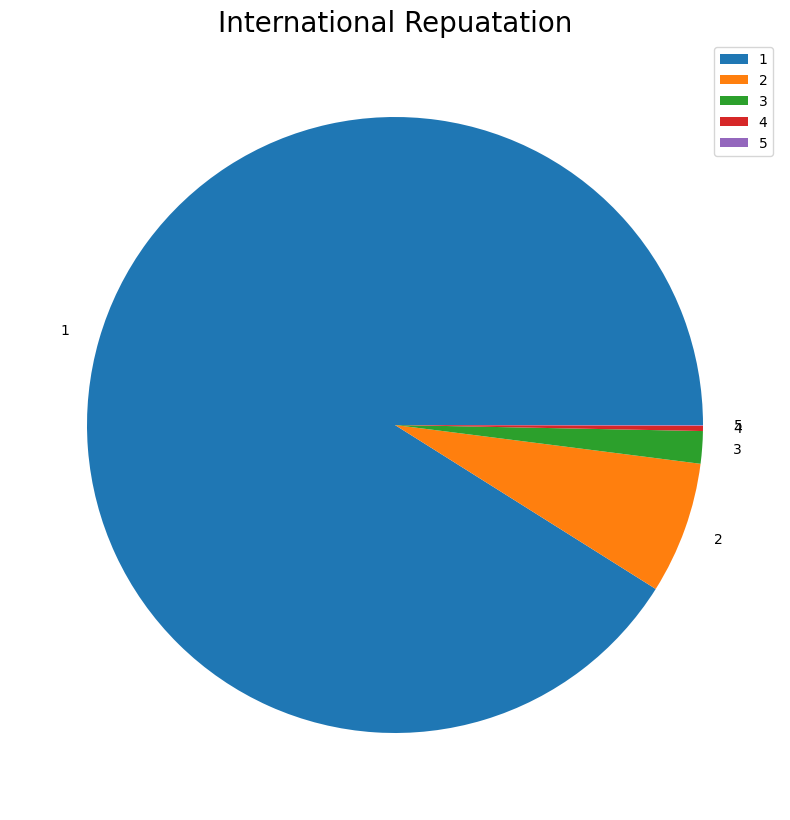

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
plt.pie( df['International Reputation'].value_counts(),labels = ['1', '2', '3', '4', '5'])
plt.title('International Repuatation', fontsize = 20)
plt.legend()
plt.show()

# Foot preferred by most of the players

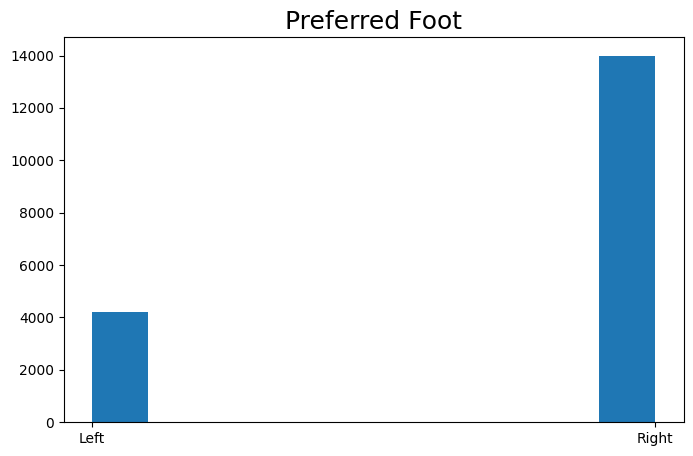

In [6]:
plt.rcParams['figure.figsize'] = (8,5)
plt.hist(df['Preferred Foot'])
plt.title('Preferred Foot', fontsize = 18)
plt.show()

# Distribution of Week Foot among Players

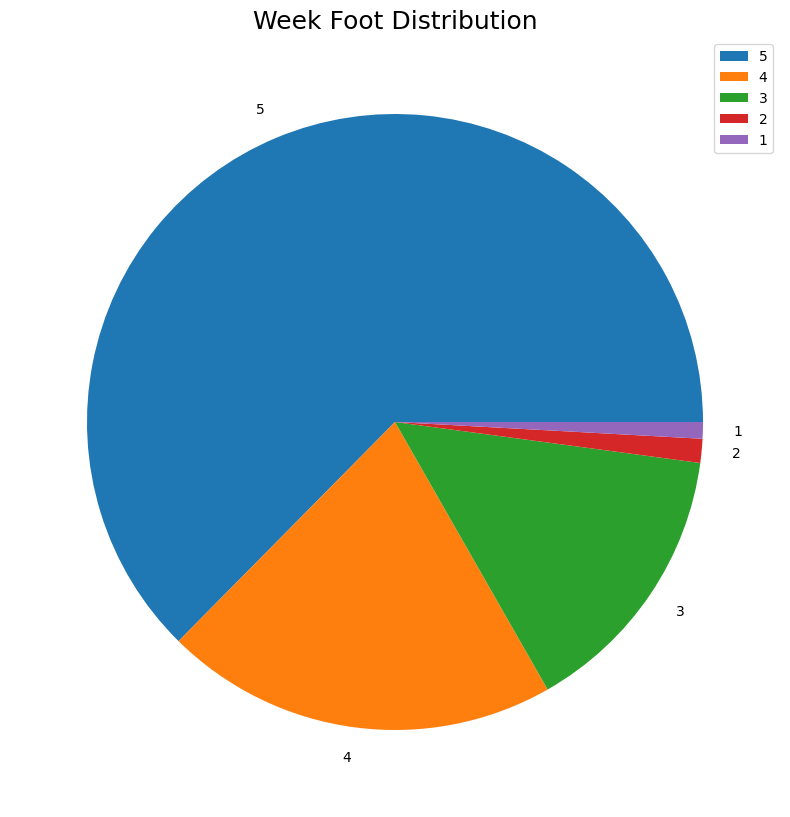

In [7]:
plt.rcParams['figure.figsize'] = (10,10)
plt.pie( df['Weak Foot'].value_counts(),labels= ['5', '4', '3', '2', '1'])
plt.title('Week Foot Distribution', fontsize = 18)
plt.legend()
plt.show()

# Score Distributions for Different Abilities

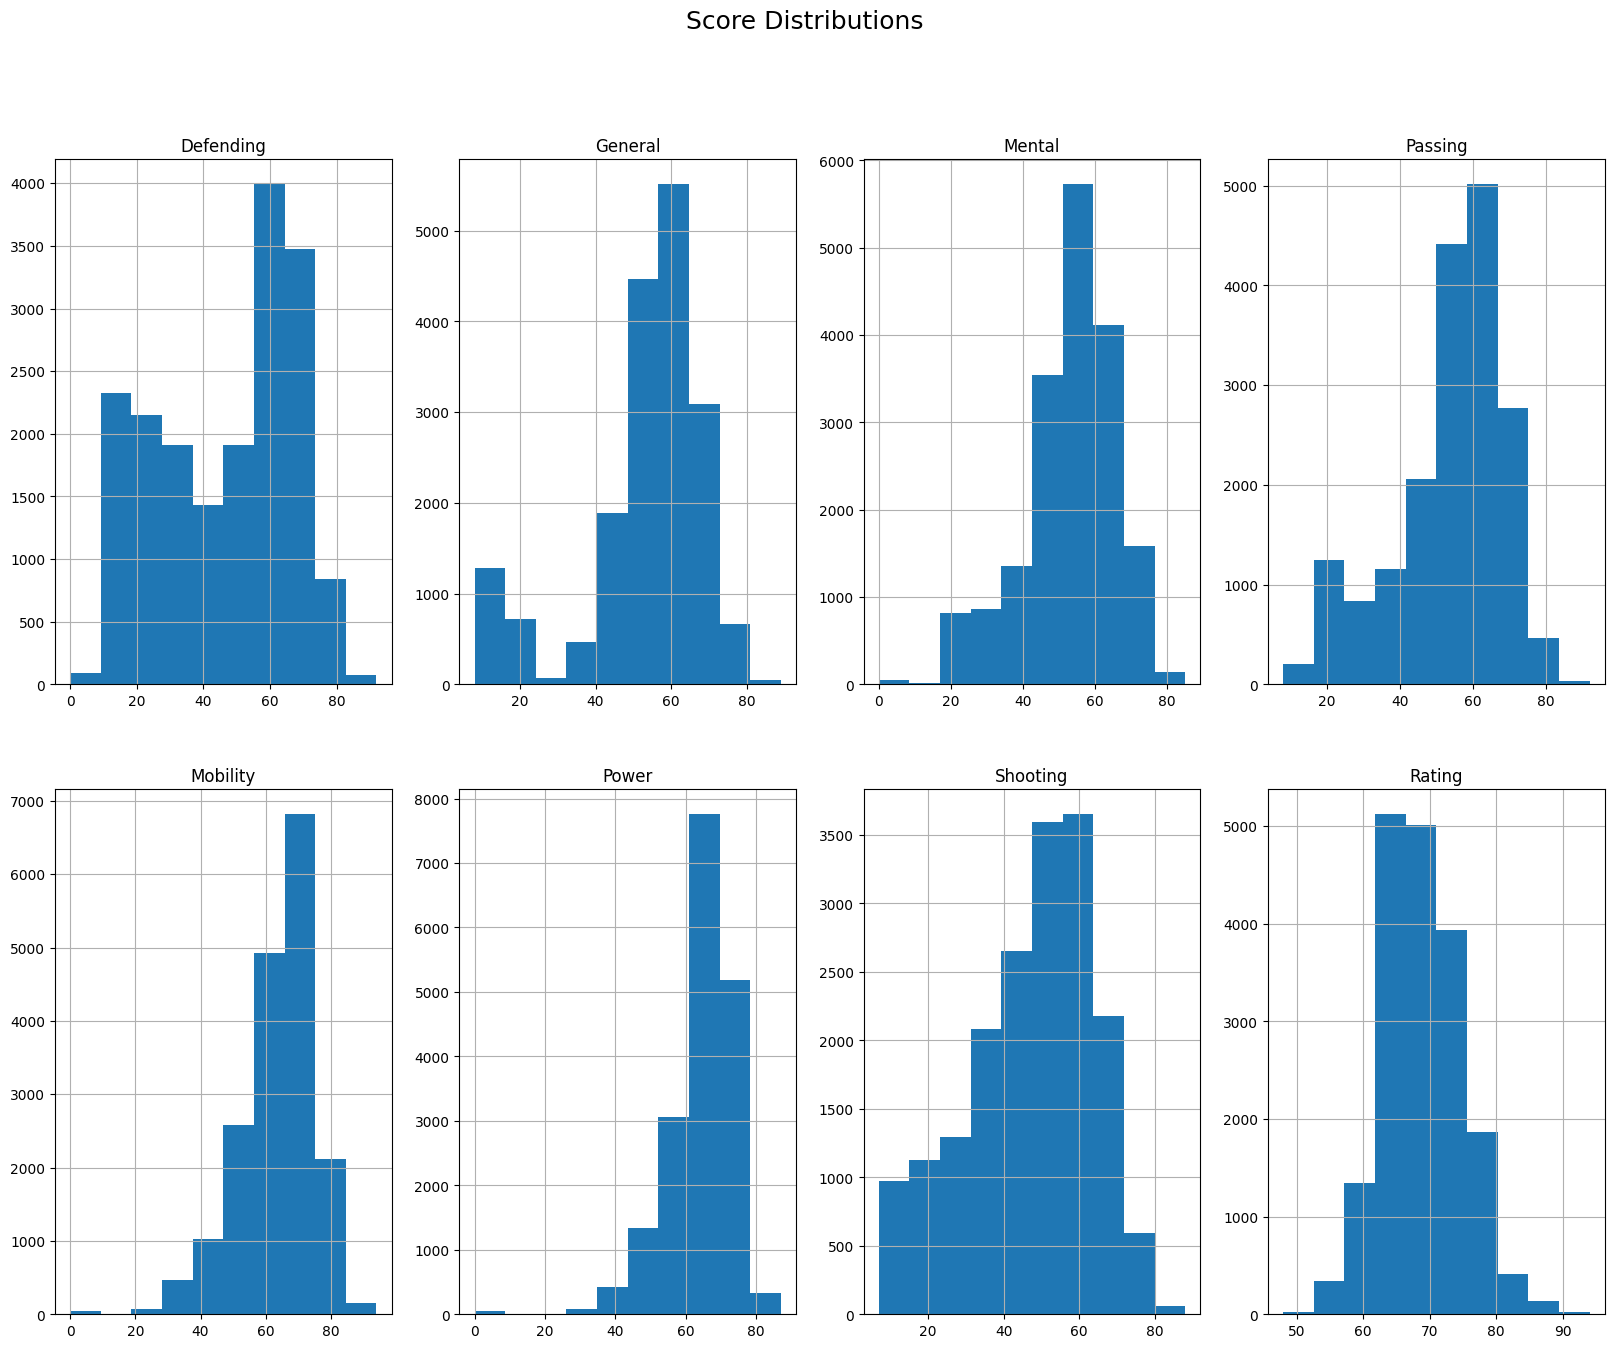

In [8]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(2,4,1)
plt.hist(df['Defending'])
plt.title('Defending')
plt.grid()

plt.subplot(2,4,2)
plt.hist(df['General'])
plt.title('General')
plt.grid()

plt.subplot(2,4,3)
plt.hist(df['Mental'])
plt.title('Mental')
plt.grid()

plt.subplot(2,4,4)
plt.hist(df['Passing'])
plt.title('Passing')
plt.grid()

plt.subplot(2,4,5)
plt.hist(df['Mobility'])
plt.title('Mobility')
plt.grid()

plt.subplot(2,4,6)
plt.hist(df['Power'])
plt.title('Power')
plt.grid()

plt.subplot(2,4,7)
plt.hist(df['Shooting'])
plt.title('Shooting')
plt.grid()

plt.subplot(2,4,8)
plt.hist(df['Rating'])
plt.title('Rating')
plt.grid()

plt.suptitle('Score Distributions',fontsize=18)
plt.show()

# Comparison of players and the respective positions

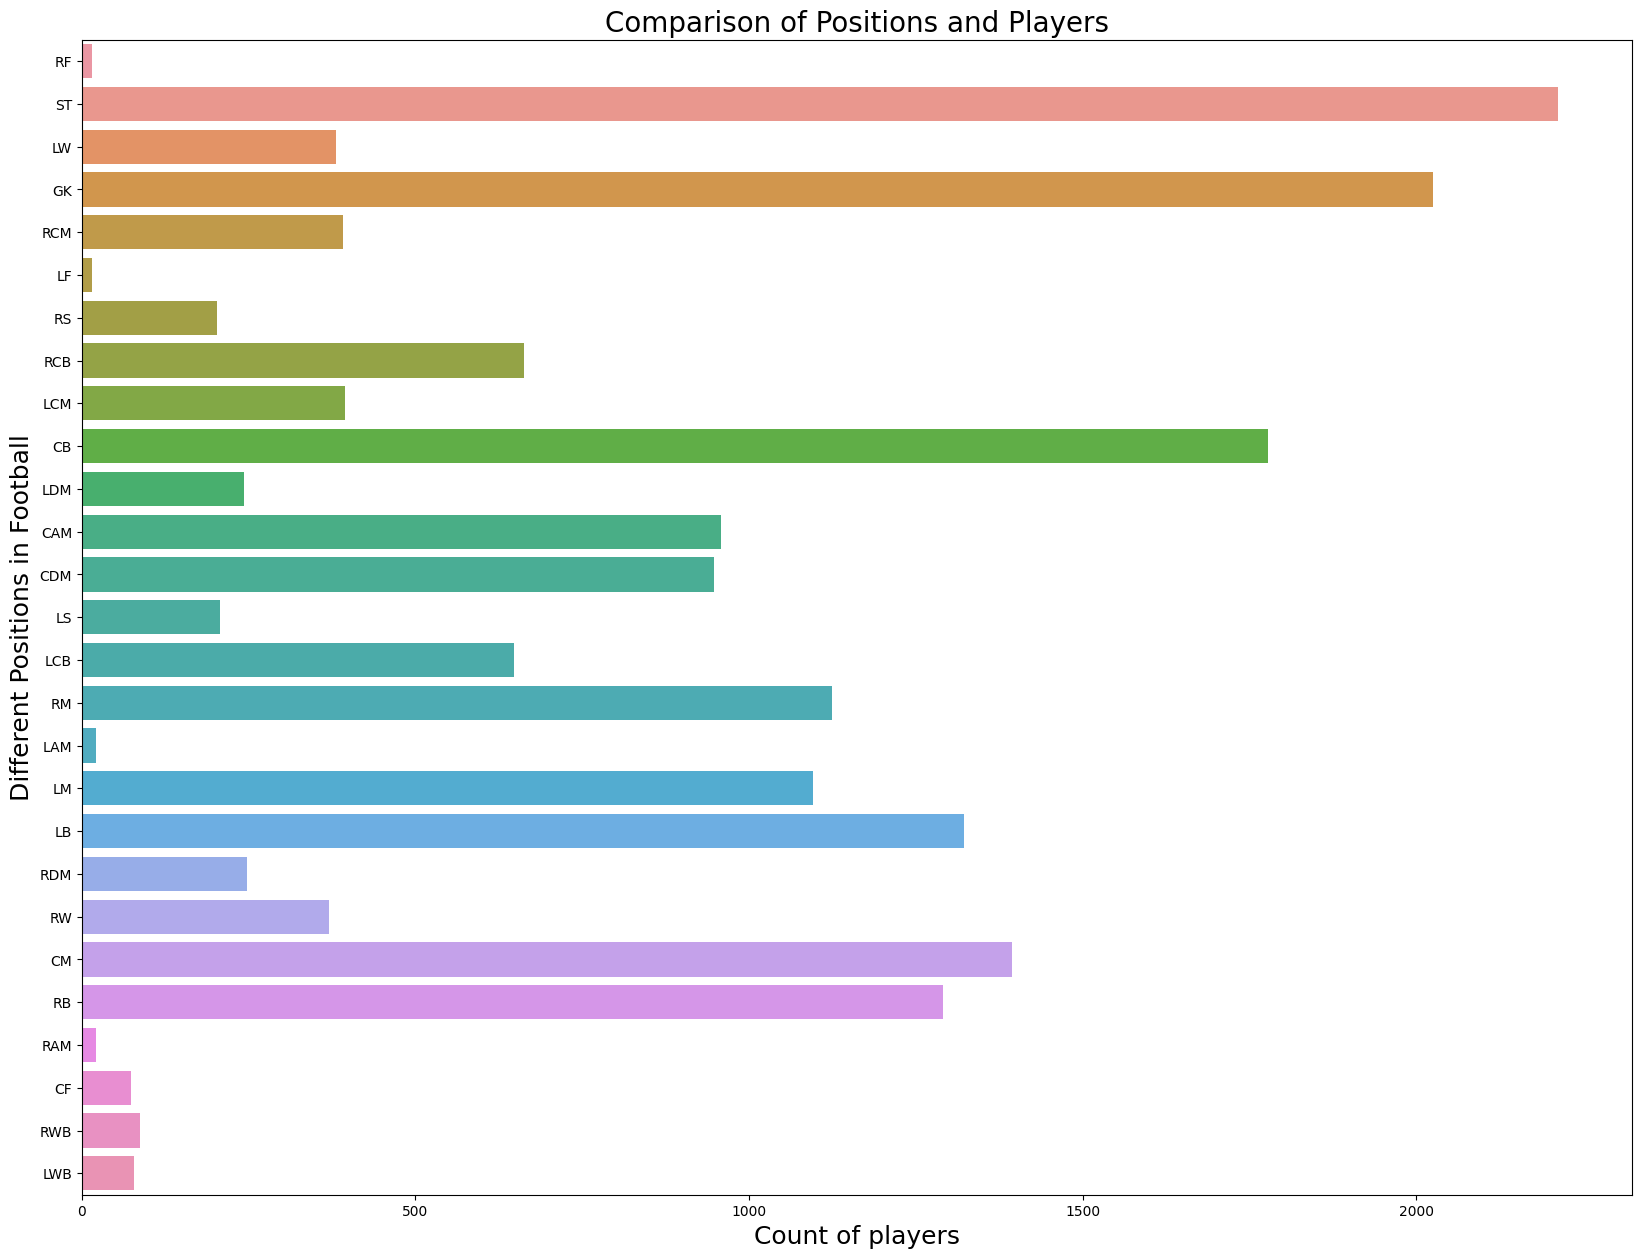

In [9]:
import seaborn as sns
plt.figure(figsize = (20,15))
ax = sns.countplot(y = 'Position', data=df)
ax.set_xlabel(xlabel = 'Count of players', fontsize = 18)
ax.set_ylabel(ylabel = 'Different Positions in Football', fontsize = 18)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

# Count of players based on their skill moves

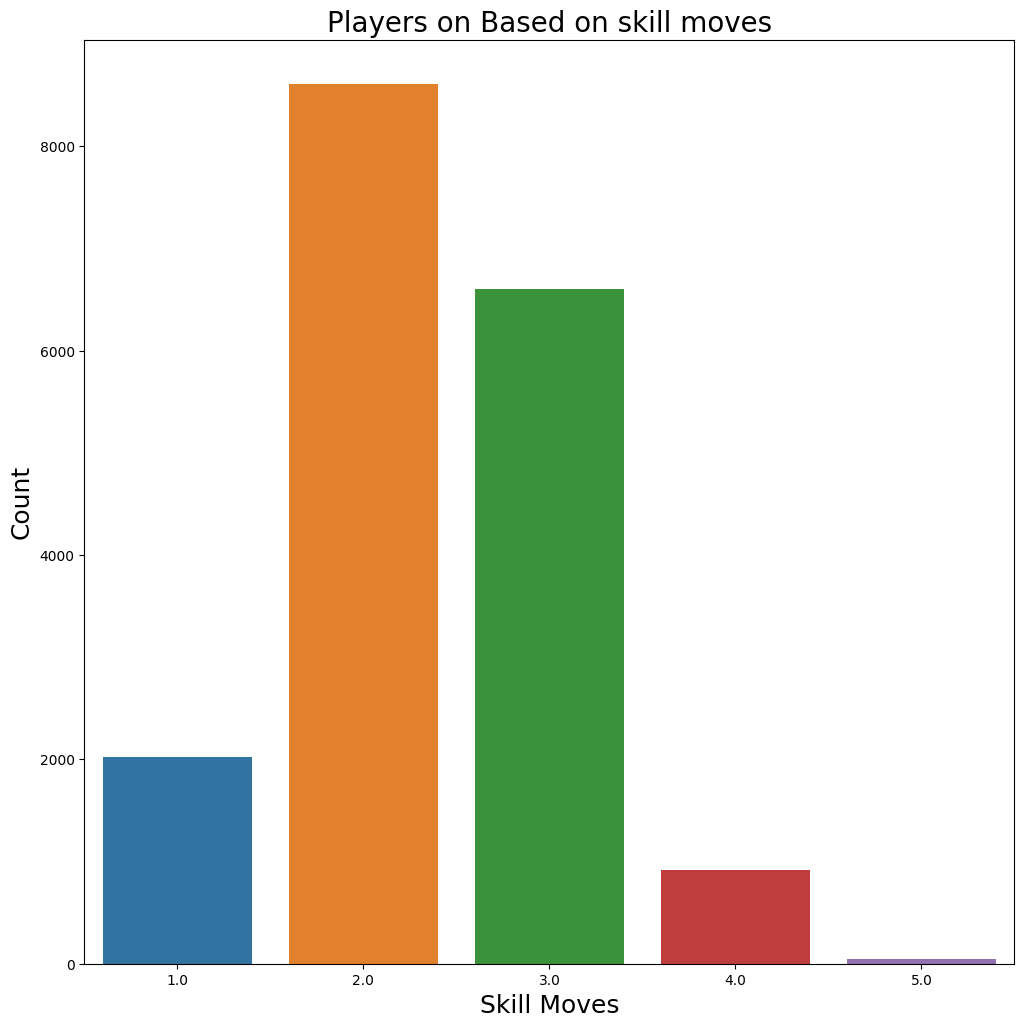

In [10]:
plt.figure(figsize = (12, 12))
ax = sns.countplot(x = 'Skill Moves', data = df)
ax.set_xlabel(xlabel = 'Skill Moves', fontsize = 18)
ax.set_ylabel(ylabel = 'Count', fontsize = 18)
ax.set_title(label = 'Players on Based on skill moves', fontsize = 20)
plt.show()

# Different work rates of the Players Participating in the FIFA 2019

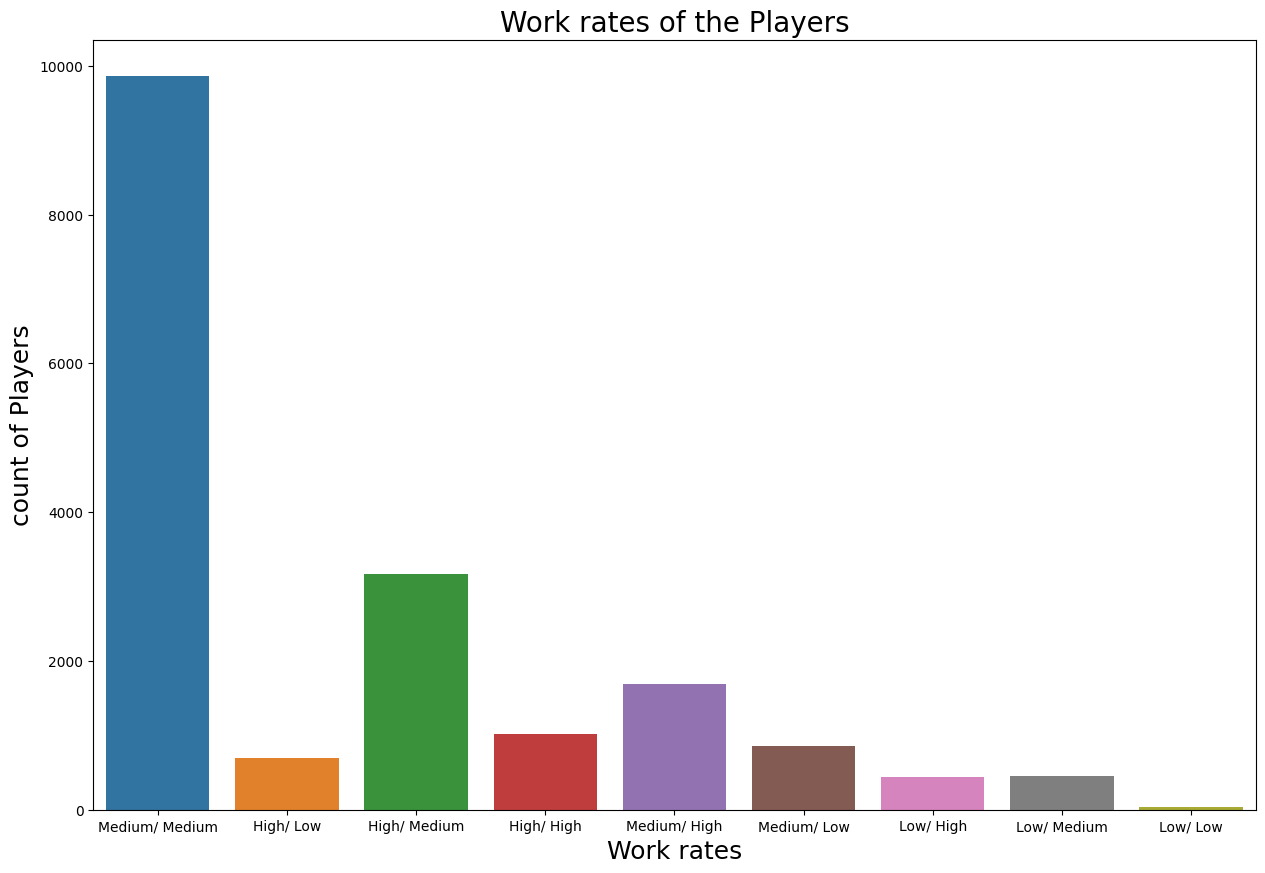

In [11]:
plt.figure(figsize = (15, 10))
ax=sns.countplot(x = 'Work Rate', data = df)
ax.set_xlabel(xlabel='Work rates', fontsize = 18)
ax.set_ylabel(ylabel='count of Players', fontsize = 18)
ax.set_title(label='Work rates of the Players', fontsize = 20)
plt.show()

# Countries and their number of players

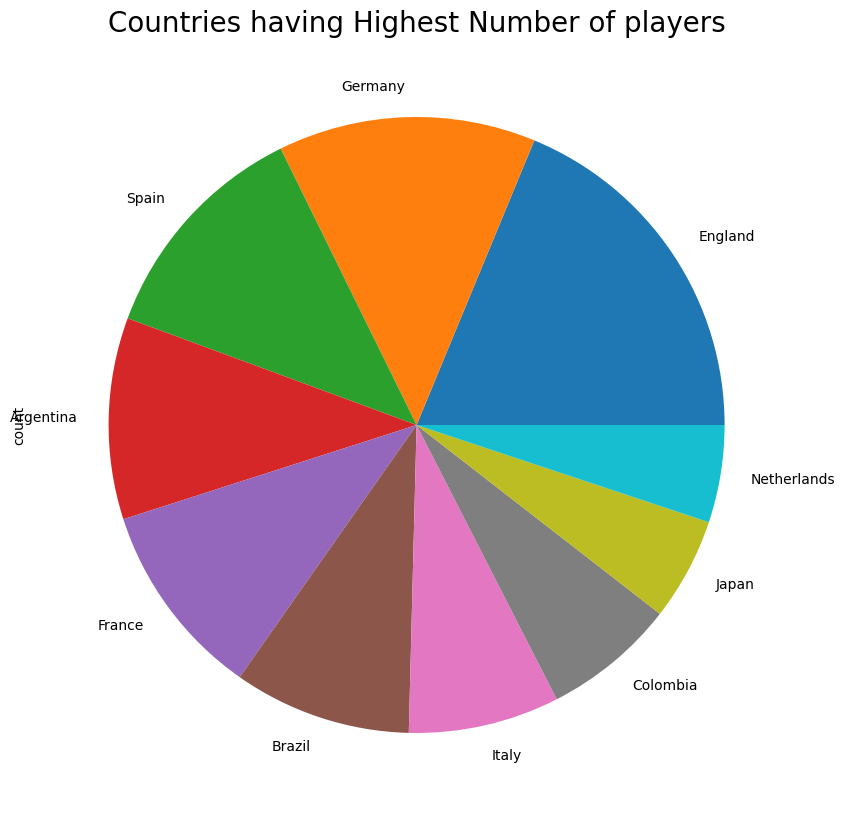

In [12]:
plt.figure(figsize = (10, 10))
df['Nationality'].value_counts().head(10).plot(kind = 'pie')                                       
plt.title('Countries having Highest Number of players', fontsize = 20)
plt.show()

# Most internationaly reputed fifa players

In [13]:
df[df['International Reputation'] == 5][['Name','Nationality','Age','Overall']].sort_values(by = 'Overall',ascending = False)

,Name,Nationality,Age,Overall
0,L. Messi,Argentina,31,94
1,Cristiano Ronaldo,Portugal,33,94
2,Neymar Jr,Brazil,26,92
7,L. Suárez,Uruguay,31,91
22,M. Neuer,Germany,32,89
109,Z. Ibrahimović,Sweden,36,85


# Players under 20 with most skill moves

In [14]:
df[(df['Skill Moves'] == 5.0) & (df['Age'] < 20) & (df['Nationality'])][['Name','Nationality','Age']]

,Name,Nationality,Age
25,K. Mbappé,France,19
1004,J. Sancho,England,18
1143,Vinícius Júnior,Brazil,17
2495,M. Ødegaard,Norway,19


# Youngest players of fifa

In [15]:
df[df['Age'] == 16][['Name', 'Age', 'Club','Nationality', 'Overall']].sort_values(by = 'Overall',ascending = False).head(10)

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium,62
15363,Y. Roemer,16,VVV-Venlo,Netherlands,59
15746,Y. Begraoui,16,AJ Auxerre,France,59
15793,J. Lahne,16,IF Brommapojkarna,Sweden,59
16254,S. Steijn,16,VVV-Venlo,Netherlands,58


# Oldest players of fifa

In [16]:
df.sort_values('Age', ascending = False)[['Name', 'Age', 'Club','Nationality', 'Overall']].head(10)

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


# Top right footed football players of fifa

In [17]:
df[df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club','Nationality', 'Overall']].sort_values(by = 'Overall',ascending = False).head(10)

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


# Top left footed football players of fifa

In [18]:
df[df['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club','Nationality', 'Overall']].sort_values(by = 'Overall',ascending = False).head(10)

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


# Players with most years of membership

In [19]:
import datetime
now = datetime.datetime.now()
df['Join_year'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Years_of_member'] = (df.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
df.sort_values('Years_of_member', ascending = False)[['Name', 'Age', 'Club','Nationality', 'Years_of_member']].head(10)

,Name,Age,Club,Nationality,Years_of_member
4741,O. Pérez,45,Pachuca,Mexico,32
9570,M. Al Shalhoub,37,Al Hilal,Saudi Arabia,25
7221,H. Sogahata,38,Kashima Antlers,Japan,25
10534,M. Ogasawara,39,Kashima Antlers,Japan,25
10545,S. Narazaki,42,Nagoya Grampus,Japan,24
7339,M. Wölfli,35,BSC Young Boys,Switzerland,23
16565,K. Kitamoto,36,Vissel Kobe,Japan,23
12393,C. Källqvist,34,BK Häcken,Sweden,22
4470,Y. Endo,38,Gamba Osaka,Japan,22
3420,S. Pellissier,39,Chievo Verona,Italy,21


# Clubs with their top ten players

In [20]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
@interact
def club(club = list(df['Club'].value_counts().index[1:])):
    return df[df['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Years_of_member']].sort_values(by = 'Overall',ascending  = False).head(10)

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…